<a href="https://colab.research.google.com/github/alxanderpierre/DS-Unit-2-Regression-Classification/blob/master/pierre_nelson__assignment_regression_classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 3

## Assignment

We're going back to our other **New York City** real estate dataset. Instead of predicting apartment rents, you'll predict property sales prices.

But not just for condos in Tribeca...

Instead, predict property sales prices for **One Family Dwellings** (`BUILDING_CLASS_CATEGORY` == `'01 ONE FAMILY DWELLINGS'`) using a subset of the data where the **sale price was more than \\$100 thousand and less than $2 million.** 

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.


- [X] Do train/test split. Use data from January — March 2019 to train. Use data from April 2019 to test.
- [X] Do exploratory visualizations with Seaborn.
- [ ] Do one-hot encoding of categorical features.
- [ ] Do feature selection with `SelectKBest`.
- [ ] Fit a linear regression model with multiple features.
- [ ] Get mean absolute error for the test set.
- [ ] As always, commit your notebook to your fork of the GitHub repo.


## Stretch Goals
- [ ] Add your own stretch goal(s) !
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Learn more about feature selection:
    - ["Permutation importance"](https://www.kaggle.com/dansbecker/permutation-importance)
    - [scikit-learn's User Guide for Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)
    - [mlxtend](http://rasbt.github.io/mlxtend/) library
    - scikit-learn-contrib libraries: [boruta_py](https://github.com/scikit-learn-contrib/boruta_py) & [stability-selection](https://github.com/scikit-learn-contrib/stability-selection)
    - [_Feature Engineering and Selection_](http://www.feat.engineering/) by Kuhn & Johnson.
- [ ] Try [statsmodels](https://www.statsmodels.org/stable/index.html) if you’re interested in more inferential statistical approach to linear regression and feature selection, looking at p values and 95% confidence intervals for the coefficients.
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).
(That book is good regardless of whether your cultural worldview is inferential statistics or predictive machine learning)
- [ ] Read Leo Breiman's paper, ["Statistical Modeling: The Two Cultures"](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module3')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd
import pandas_profiling

# Read New York City property sales data
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')

# Change column names: replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# SALE_PRICE was read as strings.
# Remove symbols, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

In [0]:
import pandas as pd
import numpy as np 

# using a subset of the data where the sale price was more than $100 thousand and less than $2 million.

In [0]:
df.SALE_PRICE

In [0]:
df.shape

(23040, 21)

In [0]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [0]:
subset = df['SALE_PRICE'] > 100000
df_subset = df[subset]
df_subset.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
44,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1,5495,801,NaN,A9,4832 BAY PARKWAY,NaN,11230.0,1.0,0.0,1.0,"6,800",1325.0,1930.0,1,A9,550000,01/01/2019
61,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,1,7918,72,NaN,A1,80-23 232ND STREET,NaN,11427.0,1.0,0.0,1.0,"4,000",2001.0,1940.0,1,A1,200000,01/01/2019
65,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,691,1130,NaN,R4,"505 WEST 19TH STREET, 7D",7D,10011.0,1.0,0.0,1.0,"18,975",1077.0,2013.0,2,R4,2000000,01/02/2019
66,1,MIDTOWN EAST,10 COOPS - ELEVATOR APARTMENTS,2,1347,18,NaN,D4,"345 EAST 54TH ST, 3B",NaN,10022.0,0.0,0.0,0.0,0,0.0,1960.0,2,D4,330000,01/02/2019
67,1,UPPER EAST SIDE (79-96),10 COOPS - ELEVATOR APARTMENTS,2,1491,62,NaN,D4,"16 EAST 80TH STREET, 2A",NaN,10075.0,0.0,0.0,0.0,0,0.0,1925.0,2,D4,600000,01/02/2019


In [0]:
df_subset2 = df_subset['SALE_PRICE'] < 2000000
df_subset_ = df_subset[df_subset2]

In [0]:
df_subset_.SALE_PRICE.describe() # how do you get this to be a real number

count    1.341100e+04
mean     7.166201e+05
std      4.068266e+05
min      1.000440e+05
25%      4.150000e+05
50%      6.333090e+05
75%      9.150000e+05
max      1.999877e+06
Name: SALE_PRICE, dtype: float64

In [0]:
# the name of the subset that i have create is called ''''df_subset_ ''''

# Use data from January — March 2019 to train

In [0]:
df_subset_['SALE_DATE'].head()

44    01/01/2019
61    01/01/2019
66    01/02/2019
67    01/02/2019
71    01/02/2019
Name: SALE_DATE, dtype: object

In [0]:
df_subset_['SALE_DATE'] = pd.to_datetime(df_subset_['SALE_DATE'], infer_datetime_format=True)
df_subset_['SALE_DATE'].describe() # was does this look so weird ask question in standup 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count                   13411
unique                    103
top       2019-01-31 00:00:00
freq                      285
first     2019-01-01 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [0]:
df_subset_['SALE_DATE'].sort_values().head()

44    2019-01-01
61    2019-01-01
159   2019-01-02
157   2019-01-02
156   2019-01-02
Name: SALE_DATE, dtype: datetime64[ns]

In [0]:
df_subset_['SALE_DATE'].dt.month.value_counts()

1    3701
3    3567
2    3174
4    2969
Name: SALE_DATE, dtype: int64

In [0]:
train = df_subset_[df_subset_['SALE_DATE'].dt.month <= 3]

In [0]:
train['SALE_DATE'].dt.month.value_counts() # JUST wanted to double check to see if i filtered ever thing right :))

1    3701
3    3567
2    3174
Name: SALE_DATE, dtype: int64

In [0]:
train.shape # went from 23k rows to 10k rows 

(10442, 21)

# Use data from April 2019 to test.

In [0]:
test = df_subset_[df_subset_['SALE_DATE'].dt.month ==4]

In [0]:
test.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
18167,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,695,1562,NaN,R4,"555 WEST 23RD STREET, N11E",N11E,10011.0,1.0,0.0,1.0,0,670.0,2005.0,2,R4,949000,2019-04-01
18170,1,CHELSEA,17 CONDO COOPS,2,721,1008,NaN,R9,"465 WEST 23RD STREET, RCU1",NaN,10011.0,0.0,0.0,0.0,0,0.0,1932.0,2,R9,1100000,2019-04-01
18173,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,31,1050,NaN,R4,"75 WALL STREET, 21I",21I,10005.0,1.0,0.0,1.0,0,438.0,1987.0,2,R4,675000,2019-04-01
18174,1,GRAMERCY,10 COOPS - ELEVATOR APARTMENTS,2,880,42,NaN,D4,"330 THIRD AVENUE, 18K",NaN,10010.0,0.0,0.0,0.0,0,0.0,1964.0,2,D4,485000,2019-04-01
18175,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,878,1010,NaN,R4,"121 EAST 22ND STREET, N204",N204,10010.0,1.0,0.0,1.0,"22,202",773.0,1952.0,2,R4,1486645,2019-04-01


In [0]:
test.SALE_DATE.head()

18167   2019-04-01
18170   2019-04-01
18173   2019-04-01
18174   2019-04-01
18175   2019-04-01
Name: SALE_DATE, dtype: datetime64[ns]

In [0]:
test.shape # the test should always be smaller than the train and that what i have 

(2969, 21)

# Do exploratory visualizations with Seaborn. predict property sales prices for One Family Dwellings (BUILDING_CLASS_CATEGORY == '01 ONE FAMILY DWELLINGS') using a subset of the data 

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [0]:
#train = train[train['BUILDING_CLASS_CATEGORY'] =='01 ONE FAMILY DWELLINGS']

In [0]:
#test = test[test['BUILDING_CLASS_CATEGORY'] =='01 ONE FAMILY DWELLINGS']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: ignored

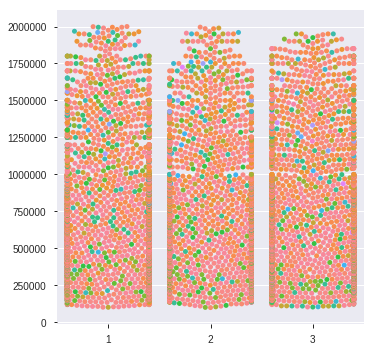

In [0]:
sns.catplot(x=train['SALE_DATE'].dt.month, y='SALE_PRICE',hue='BUILDING_CLASS_CATEGORY', kind='swarm', data=train);

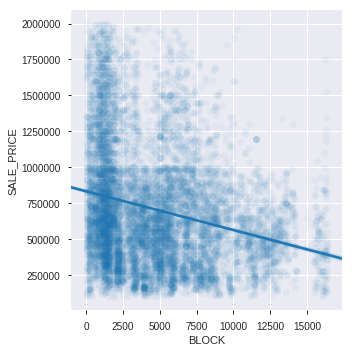

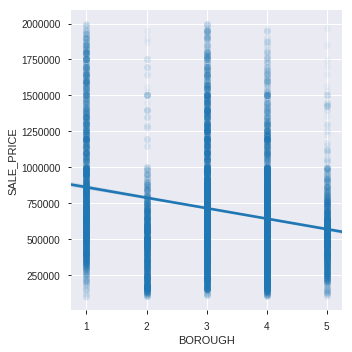

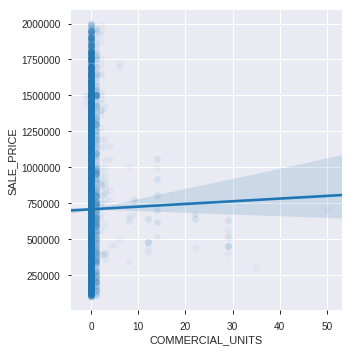

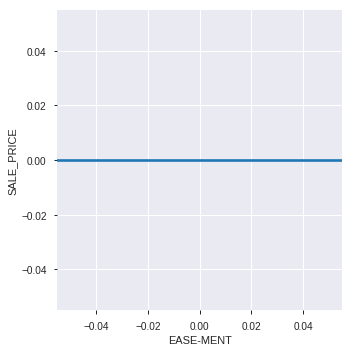

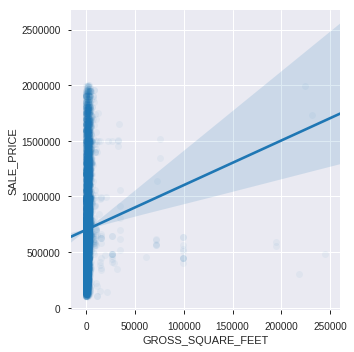

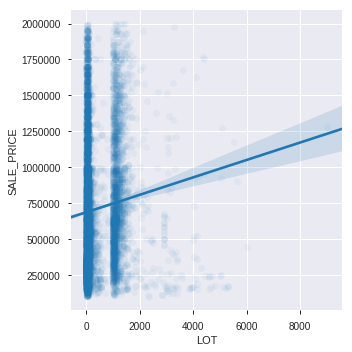

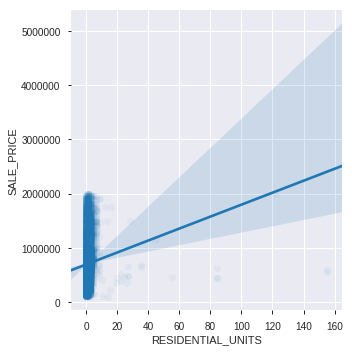

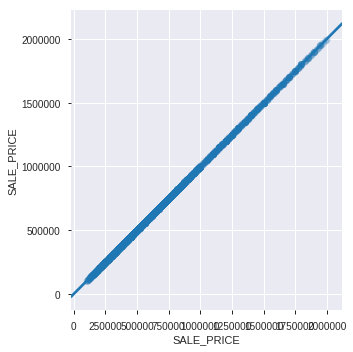

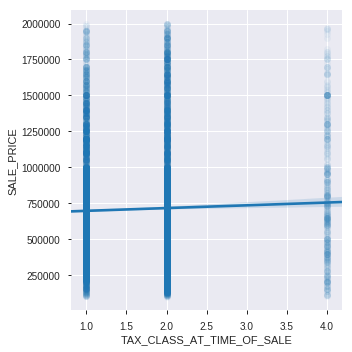

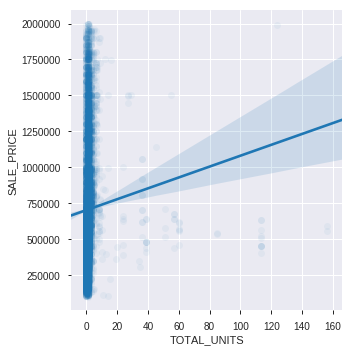

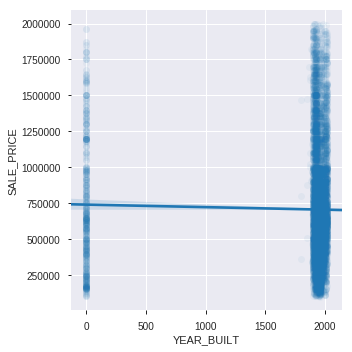

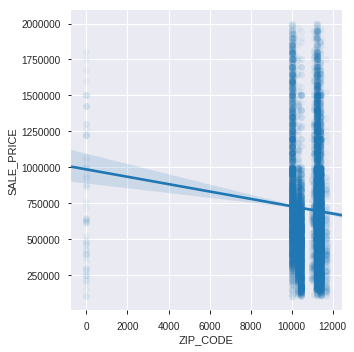

In [0]:
numeric = train.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='SALE_PRICE', data=train, scatter_kws=dict(alpha=0.05))
    plt.show()

In [0]:
# DONT think this is the best way to go about the visiuals but hey MVP Right (ask questons in stand up about this part)

# Do one-hot encoding of categorical features.

In [0]:
train.describe(exclude='number').T

,count,unique,top,freq,first,last
NEIGHBORHOOD,10442,245,FLUSHING-NORTH,307,NaN,NaN
BUILDING_CLASS_CATEGORY,10442,40,01 ONE FAMILY DWELLINGS,2507,NaN,NaN
TAX_CLASS_AT_PRESENT,10442,10,1,4949,NaN,NaN
BUILDING_CLASS_AT_PRESENT,10442,96,D4,2110,NaN,NaN
ADDRESS,10442,10397,N/A BAY STREET,4,NaN,NaN
APARTMENT_NUMBER,2136,826,2A,42,NaN,NaN
LAND_SQUARE_FEET,10417,1993,0,4061,NaN,NaN
BUILDING_CLASS_AT_TIME_OF_SALE,10442,96,D4,2110,NaN,NaN
SALE_DATE,10442,80,2019-01-31 00:00:00,285,2019-01-01 00:00:00,2019-03-30 00:00:00
